In [1]:
import numpy as np
import pandas as pd
import cleandata
from features import year_begin, year_end, desired_indicators, field_names
import plots
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler

In [2]:
clean = False
remove_duplicate_medals = False
save_normalized = True
raw_data = ['merged_data.csv']

# Removing multiple medals for each team sport
if remove_duplicate_medals:
    cleandata.remove_duplicate_medals(raw_data)
    
if not clean:
   data = pd.read_csv('clean_data.csv')
else:
    data = cleandata.main(year_begin, year_end, desired_indicators, field_names)

In [3]:
# Resizing Units
data.GDP = data.GDP/1000000000000
data.Pop = data.Pop/1000000000
data.Area = data.Area/1000000
data.GDP_Per_Capita = data.GDP_Per_Capita/1000


In [4]:
if 'Unnamed: 0' in data.columns:
    data = data.drop(column=['Unnamed: 0'])
    
if save_normalized:
    data.to_csv('clean_data2.csv', index=False)


In [5]:
traintest = cleandata.train_test_split(data, year_end)

In [6]:
tonumpy = cleandata.to_numpy(traintest[0], traintest[1], traintest[2], traintest[3])
xt = traintest[0].to_numpy()
yt = traintest[1].to_numpy()
xv = traintest[2].to_numpy()
yv = traintest[3].to_numpy()

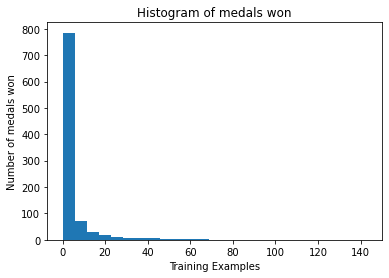

In [7]:
plots.plot_hist(data, 'Medals', 'hist.ps')

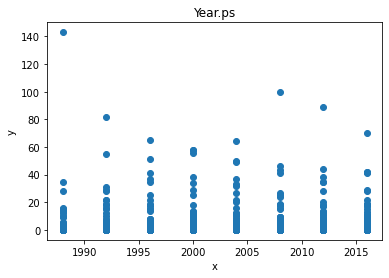

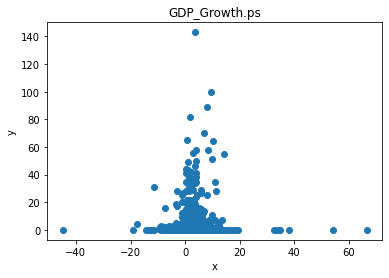

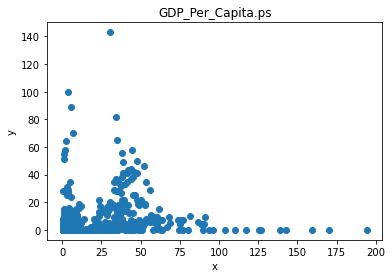

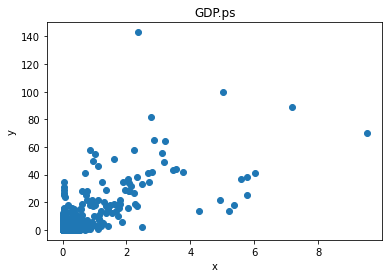

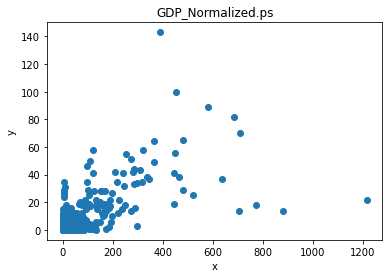

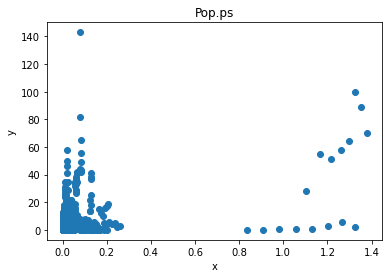

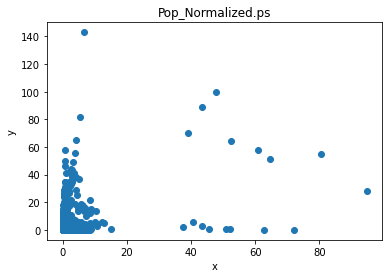

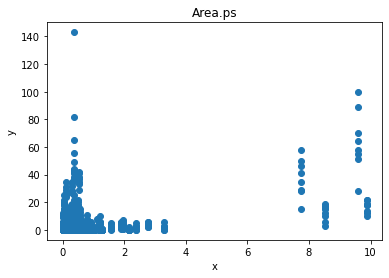

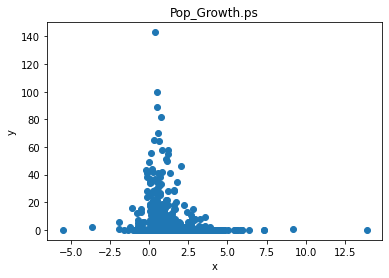

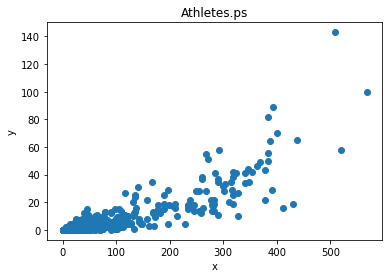

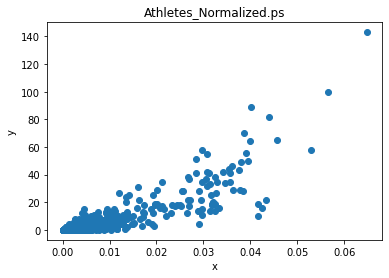

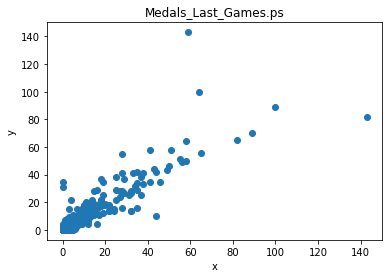

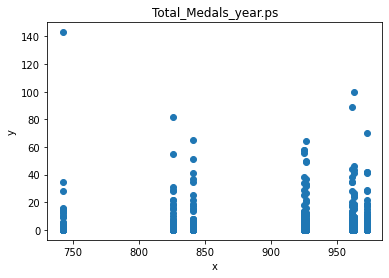

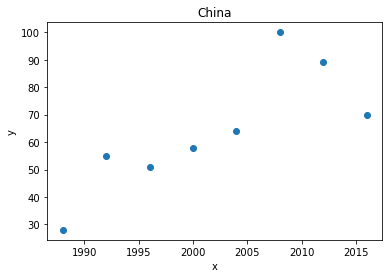

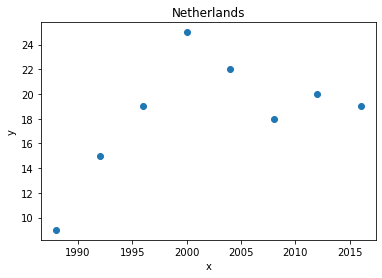

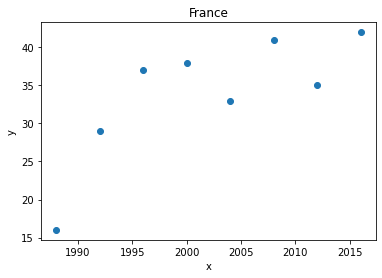

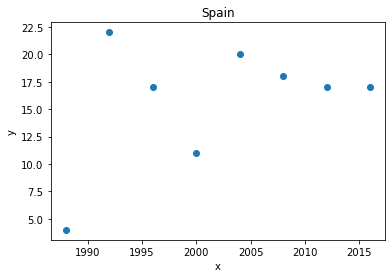

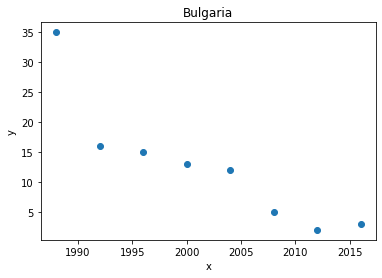

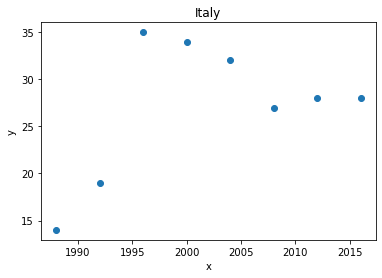

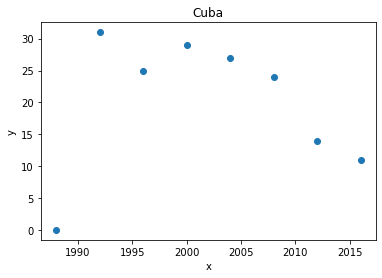

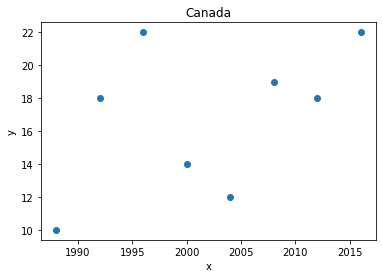

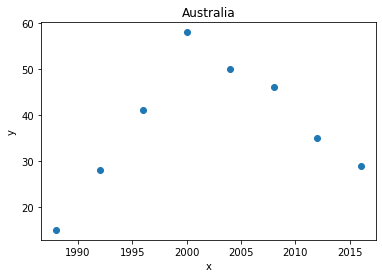

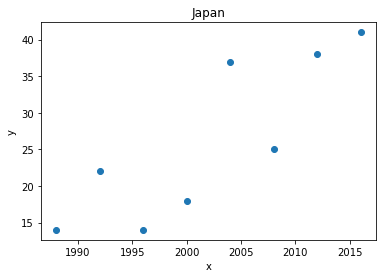

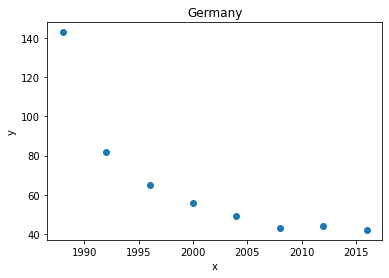

In [8]:
# Creating plot for all features
for feature in data.drop(columns=['Nation', 'Medals']).columns:
    plots.plot(data[feature], data['Medals'], feature+'.ps')
    
for nation in data.Nation.unique():
    x = data[data.Nation == nation].Year
    y = data[data.Nation == nation].Medals
    if np.sum(y)>100:
        plots.plot(x, y, nation, nation+'.ps')


In [9]:
# Baeline Model: Linear Regression
lrm = LinearRegression(fit_intercept=True)
lrm.fit(xt, yt)
y_predict = lrm.predict(xv)


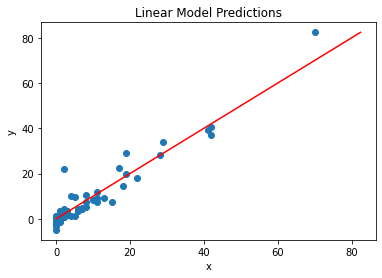

In [10]:
plots.plot(traintest[3], y_predict, 'Linear Model Predictions', 'linearregmodPred.ps', line=True)

In [11]:
i=0
for index in traintest[3].index:
    print(data.iloc[index].Nation + '\t' + str(traintest[3][index]) + '\t' + str(y_predict[i]))
    i+=1

China	70	82.4428125396215
Finland	1	2.03345212534407
Norway	4	1.4386298038780296
Netherlands	19	19.823031344580897
France	42	36.89192003009754
Morocco	1	1.8490300840624343
Spain	17	22.636938518959056
Bulgaria	3	1.7249991405849698
Italy	28	28.336013324277445
Chad	0	-1.488477142545122
Argentina	4	10.105513401216115
Cuba	11	12.04154669198519
Greece	6	3.9157568641338116
Cameroon	0	0.054501979007199
Turkey	8	7.424703355977869
Mexico	5	9.62901611606523
Chile	0	0.5080362681153474
Nicaragua	0	-1.11766731341433
Algeria	2	1.8739410790721536
Bahrain	2	0.9815084054525869
Pakistan	0	1.1217369591424529
Iraq	0	0.20747950403247728
Malaysia	5	1.440667173528368
Canada	22	17.938795590963167
Ireland	2	4.144400964597196
Australia	29	33.77345889991477
South Africa	10	8.3377454227099
Jordan	1	-0.6186335959587268
Belgium	6	4.283435735183133
Comoros	0	-0.9820972800820869
Saudi Arabia	0	-0.9500476891969356
United Arab Emirates	1	-1.2947310315159655
Indonesia	3	3.5094735729486786
Nigeria	1	3.478348394622259
Japa

In [12]:
print('Accuracy: ' + str(mse(traintest[3], y_predict)))

Accuracy: 9.46006091974866


In [13]:
for i in range(len(traintest[0].columns)):
    print(str(traintest[0].columns[i] + ':' + str(lrm.coef_[i])))
    i+=1    


Year:-0.11072967478457164
GDP_Growth:0.004312321410101447
GDP_Per_Capita:-0.01886753249306644
GDP:1.698893089264688
GDP_Normalized:-0.015924026944942785
Pop:15.534610342610899
Pop_Normalized:-0.15256188716765273
Area:-0.5298183326380845
Pop_Growth:0.1789535606358234
Athletes:-0.04909285778102498
Athletes_Normalized:1053.1441805173133
Medals_Last_Games:0.5361925477943362
Total_Medals_year:0.013810676482297241
